# Preambule

## Package import 

In [4]:
#library(scales)
library(tidyverse)
library(stringr)
library(nlme)
library(rcompanion)
library('wesanderson')

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse



## Packages version

In [5]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/small_projects/aruaud/miniconda3/envs/test/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/small_projects/aruaud/miniconda3/envs/test/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] wesanderson_0.3.6 rcompanion_1.11.1 nlme_3.1-131      stringr_1.2.0    
 [5] dplyr_0.7.4       purrr_0.2.3       readr_1.1.1       tidyr_0.7.1      
 [9] tibble_1.3.4      ggplot2_2.2.1     tid

## Functions

In [3]:
# Multiple plot function from : http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

# Data

In [ ]:
pp <- read.table('../data/Data_stats.txt', sep = '\t', quote = '', header = TRUE)

In [14]:
### Transform data
# Comment: f_Christensenellaceae = g_Christensenella

pp$Ch_tr <- transformTukey(pp$g_Christensenella, plotit = FALSE)
pp$Cm_tr <- transformTukey(pp$s_Christensenella_minuta, plotit = FALSE)
pp$Cma_tr <- transformTukey(pp$s_Christensenella_massiliensis, plotit = FALSE)
pp$Ct_tr <- transformTukey(pp$s_Christensenella_timonensis, plotit = FALSE)

pp$Meth_f_tr <- transformTukey(pp$f_Methanobacteriaceae, plotit = FALSE)
pp$Meth_g_tr <- transformTukey(pp$g_Methanobrevibacter, plotit = FALSE)
pp$Meth_s_tr <- transformTukey(pp$s_Methanobrevibacter_smithii, plotit = FALSE)
pp$Mstadt_tr <- transformTukey(pp$s_Methanosphaera_stadtmanae, plotit = FALSE) 


    lambda      W Shapiro.p.value
417    0.4 0.9965       0.0003405

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 


    lambda      W Shapiro.p.value
416  0.375 0.9939       7.243e-07

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 


    lambda      W Shapiro.p.value
414  0.325 0.9774       2.264e-16

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 


    lambda      W Shapiro.p.value
417    0.4 0.9559       4.768e-23

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 


    lambda      W Shapiro.p.value
406  0.125 0.9163       1.354e-30

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 


    lambda      W Shapiro.p.value
406  0.125 0.9191       3.528e-30



# Models on transformed data

## Family

In [17]:
## null model:
ch_null <- lme(Ch_tr ~ BMI + age , random = ~ 1 | Batch/Ind, data = pp, method = 'ML')

In [15]:
#+ age:Meth_f/g_tr
ch_mf <- lme(Ch_tr ~ BMI + age* Meth_f_tr, random = ~ 1 | Batch/Ind, data = pp, method = 'ML')

In [21]:
cat('chi2 - null vs family:\n')
anova(ch_null, ch_mf, test = TRUE, verbose = T) %>% print
cat('\n \nsequential anova\n')
anova(ch_mf, type = 'sequential') %>% print
cat('\n \nmodel\n')
ch_mf

chi2 - null vs family:
Call:
 ch_null:
  lme.formula(fixed = Ch_tr ~ BMI + age, data = pp, random = ~1 |     Batch/Ind, method = "ML") 
 ch_mf:
  lme.formula(fixed = Ch_tr ~ BMI + age * Meth_f_tr, data = pp,     random = ~1 | Batch/Ind, method = "ML") 

        Model df       AIC       BIC   logLik   Test  L.Ratio p-value
ch_null     1  6 -10735.30 -10702.25 5373.648                        
ch_mf       2  8 -11001.84 -10957.79 5508.922 1 vs 2 270.5482  <.0001

 
sequential anova
              numDF denDF  F-value p-value
(Intercept)       1  1468 414.2613  <.0001
BMI               1   339  14.4589  0.0002
age               1  1468   6.5615  0.0105
Meth_f_tr         1   339 287.0339  <.0001
age:Meth_f_tr     1   339   8.3012  0.0042

 
model


Linear mixed-effects model fit by maximum likelihood
  Data: pp 
  Log-likelihood: 5508.922
  Fixed: Ch_tr ~ BMI + age * Meth_f_tr 
  (Intercept)           BMI           age     Meth_f_tr age:Meth_f_tr 
 4.732655e-02 -2.718472e-04 -5.498501e-05  2.143361e-02  2.752793e-04 

Random effects:
 Formula: ~1 | Batch
        (Intercept)
StdDev:  0.00739822

 Formula: ~1 | Ind %in% Batch
        (Intercept)    Residual
StdDev:  0.01132903 0.006336489

Number of Observations: 1821
Number of Groups: 
         Batch Ind %in% Batch 
            10           1479 

## Genus

In [22]:
ch_mg <- lme(Ch_tr ~ BMI + age* Meth_g_tr, random = ~ 1 | Batch/Ind, data = pp, method = 'ML')

In [23]:
cat('chi2 - null vs genus:\n')
anova(ch_null, ch_mg, test = TRUE, verbose = T) %>% print
cat('\n \nsequential anova\n')
anova(ch_mg, type = 'sequential') %>% print
cat('\n \nmodel\n')
ch_mg

chi2 - null vs genus:
Call:
 ch_null:
  lme.formula(fixed = Ch_tr ~ BMI + age, data = pp, random = ~1 |     Batch/Ind, method = "ML") 
 ch_mg:
  lme.formula(fixed = Ch_tr ~ BMI + age * Meth_g_tr, data = pp,     random = ~1 | Batch/Ind, method = "ML") 

        Model df       AIC       BIC   logLik   Test  L.Ratio p-value
ch_null     1  6 -10735.30 -10702.25 5373.648                        
ch_mg       2  8 -10992.98 -10948.92 5504.488 1 vs 2 261.6813  <.0001

 
sequential anova
              numDF denDF  F-value p-value
(Intercept)       1  1468 431.0135  <.0001
BMI               1   339  14.2939  0.0002
age               1  1468   6.5329  0.0107
Meth_g_tr         1   339 274.3491  <.0001
age:Meth_g_tr     1   339  10.1873  0.0015

 
model


Linear mixed-effects model fit by maximum likelihood
  Data: pp 
  Log-likelihood: 5504.488
  Fixed: Ch_tr ~ BMI + age * Meth_g_tr 
  (Intercept)           BMI           age     Meth_g_tr age:Meth_g_tr 
 4.900919e-02 -2.848030e-04 -6.048124e-05  1.855788e-02  2.917139e-04 

Random effects:
 Formula: ~1 | Batch
        (Intercept)
StdDev: 0.007244334

 Formula: ~1 | Ind %in% Batch
        (Intercept)    Residual
StdDev:  0.01140623 0.006307953

Number of Observations: 1821
Number of Groups: 
         Batch Ind %in% Batch 
            10           1479 

## Methanogens

In [24]:
msmi_null <- lme(Meth_s_tr ~ age + BMI, random = ~ 1 | Batch/Ind, data = pp, method = 'ML')
mg_null <- lme(Meth_g_tr ~ age + BMI , random = ~ 1 | Batch/Ind, data = pp, method = 'ML')
mf_null <- lme(Meth_f_tr ~ age + BMI , random = ~ 1 | Batch/Ind, data = pp, method = 'ML')

In [28]:
mf_null %>% anova(type = 'marginal')
mg_null %>% anova(type = 'marginal')
msmi_null %>% anova(type = 'marginal')

,numDF,denDF,F-value,p-value
(Intercept),1,1468,75.376475,0.000000000
age,1,1468,10.347971,0.001324433
BMI,1,341,6.658303,0.010287127


,numDF,denDF,F-value,p-value
(Intercept),1,1468,55.042891,1.987299e-13
age,1,1468,12.465471,4.273566e-04
BMI,1,341,5.108513,2.443899e-02


,numDF,denDF,F-value,p-value
(Intercept),1,1468,37.57746,1.126877e-09
age,1,1468,13.22450,2.858656e-04
BMI,1,341,4.13418,4.279947e-02


## minuta

In [31]:
cmin_null <- lme(Cm_tr ~ BMI + age, random = ~ 1 | Batch/Ind, data = pp, method = 'ML')
cmin_msmi <- lme(Cm_tr ~ BMI + age* Meth_s_tr, random = ~ 1 | Batch/Ind, data = pp, method = 'ML')

In [32]:
cat('chi2 - null vs genus:\n')
anova(cmin_null, cmin_msmi, test = TRUE, verbose = T) %>% print
cat('\n \nsequential anova\n')
anova(cmin_msmi, type = 'sequential') %>% print
cat('\n \nmodel\n')
cmin_msmi

chi2 - null vs genus:
Call:
 cmin_null:
  lme.formula(fixed = Cm_tr ~ BMI + age, data = pp, random = ~1 |     Batch/Ind, method = "ML") 
 cmin_msmi:
  lme.formula(fixed = Cm_tr ~ BMI + age * Meth_s_tr, data = pp,     random = ~1 | Batch/Ind, method = "ML") 

          Model df       AIC       BIC   logLik   Test  L.Ratio p-value
cmin_null     1  6 -10639.36 -10606.31 5325.678                        
cmin_msmi     2  8 -10791.83 -10747.78 5403.917 1 vs 2 156.4765  <.0001

 
sequential anova
              numDF denDF  F-value p-value
(Intercept)       1  1468 355.2181  <.0001
BMI               1   339  10.9109  0.0011
age               1  1468   7.2780  0.0071
Meth_s_tr         1   339 147.8221  <.0001
age:Meth_s_tr     1   339  17.9877  <.0001

 
model


Linear mixed-effects model fit by maximum likelihood
  Data: pp 
  Log-likelihood: 5403.917
  Fixed: Cm_tr ~ BMI + age * Meth_s_tr 
  (Intercept)           BMI           age     Meth_s_tr age:Meth_s_tr 
 0.0524717415 -0.0002856081 -0.0000585519  0.0061927131  0.0003667136 

Random effects:
 Formula: ~1 | Batch
        (Intercept)
StdDev: 0.008052793

 Formula: ~1 | Ind %in% Batch
        (Intercept)    Residual
StdDev:  0.01236517 0.006370013

Number of Observations: 1821
Number of Groups: 
         Batch Ind %in% Batch 
            10           1479 

## massiliensis 

In [33]:
cma_null <- lme(Cma_tr ~ BMI, random = ~ 1 | Batch/Ind, data = pp, method = 'ML')
cma_msmi <- lme(Cma_tr ~ BMI + Meth_s_tr + age*Meth_s_tr, random = ~ 1 | Batch/Ind, data = pp, method = 'ML')

In [34]:
cat('chi2 - null vs genus:\n')
anova(cma_null, cma_msmi, test = TRUE, verbose = T) %>% print
cat('\n \nsequential anova\n')
anova(cma_msmi, type = 'sequential') %>% print
cat('\n \nmodel\n')
cma_msmi

chi2 - null vs genus:
Call:
 cma_null:
  lme.formula(fixed = Cma_tr ~ BMI, data = pp, random = ~1 | Batch/Ind,     method = "ML") 
 cma_msmi:
  lme.formula(fixed = Cma_tr ~ BMI + Meth_s_tr + age * Meth_s_tr,     data = pp, random = ~1 | Batch/Ind, method = "ML") 

         Model df       AIC       BIC   logLik   Test  L.Ratio p-value
cma_null     1  5 -10197.55 -10170.01 5103.775                        
cma_msmi     2  8 -10473.56 -10429.50 5244.781 1 vs 2 282.0121  <.0001

 
sequential anova
              numDF denDF  F-value p-value
(Intercept)       1  1468 924.3813  <.0001
BMI               1   339   8.9973  0.0029
Meth_s_tr         1   339 308.8672  <.0001
age               1  1468   0.5150  0.4731
Meth_s_tr:age     1   339   7.3492  0.0071

 
model


Linear mixed-effects model fit by maximum likelihood
  Data: pp 
  Log-likelihood: 5244.781
  Fixed: Cma_tr ~ BMI + Meth_s_tr + age * Meth_s_tr 
  (Intercept)           BMI     Meth_s_tr           age Meth_s_tr:age 
 0.0538501631 -0.0002279611  0.0231125188 -0.0001026074  0.0002552755 

Random effects:
 Formula: ~1 | Batch
        (Intercept)
StdDev: 0.005211023

 Formula: ~1 | Ind %in% Batch
        (Intercept)    Residual
StdDev:  0.01282036 0.007629755

Number of Observations: 1821
Number of Groups: 
         Batch Ind %in% Batch 
            10           1479 

## timonensis

In [35]:
ctim_null <- lme(Ct_tr ~ BMI + age, random = ~ 1 | Batch/Ind, data = pp, method = 'ML')
ctim_msmi <- lme(Ct_tr ~ BMI + age* Meth_s_tr, random = ~ 1 | Batch/Ind, data = pp, method = 'ML')

In [36]:
cat('chi2 - null vs genus:\n')
anova(ctim_null, ctim_msmi, test = TRUE, verbose = T) %>% print
cat('\n \nsequential anova\n')
anova(ctim_msmi, type = 'sequential') %>% print
cat('\n \nmodel\n')
ctim_msmi

chi2 - null vs genus:
Call:
 ctim_null:
  lme.formula(fixed = Ct_tr ~ BMI + age, data = pp, random = ~1 |     Batch/Ind, method = "ML") 
 ctim_msmi:
  lme.formula(fixed = Ct_tr ~ BMI + age * Meth_s_tr, data = pp,     random = ~1 | Batch/Ind, method = "ML") 

          Model df       AIC       BIC   logLik   Test  L.Ratio p-value
ctim_null     1  6 -13368.74 -13335.70 6690.372                        
ctim_msmi     2  8 -13812.43 -13768.37 6914.214 1 vs 2 447.6847  <.0001

 
sequential anova
              numDF denDF  F-value p-value
(Intercept)       1  1468 306.7389  <.0001
BMI               1   339  16.6151  0.0001
age               1  1468  10.5919  0.0012
Meth_s_tr         1   339 482.4218  <.0001
age:Meth_s_tr     1   339  35.5029  <.0001

 
model


Linear mixed-effects model fit by maximum likelihood
  Data: pp 
  Log-likelihood: 6914.214
  Fixed: Ct_tr ~ BMI + age * Meth_s_tr 
  (Intercept)           BMI           age     Meth_s_tr age:Meth_s_tr 
 0.0186435767 -0.0001277269 -0.0000496509  0.0071711977  0.0002202930 

Random effects:
 Formula: ~1 | Batch
        (Intercept)
StdDev:  0.00318541

 Formula: ~1 | Ind %in% Batch
        (Intercept)    Residual
StdDev:  0.00424922 0.003775362

Number of Observations: 1821
Number of Groups: 
         Batch Ind %in% Batch 
            10           1479 

# Figures

## Plot abundances

In [37]:
pp$Batch_rename <- ifelse(pp$Batch == 'TUK', 'XieG_2016'
                         , ifelse(pp$Batch == 'AMY', 'PooleA_2019', pp$Batch %>% as.character))

In [38]:
col <- c(wes_palette("Darjeeling1"), wes_palette("Cavalcanti1"))

In [39]:
y_f <- expression(italic(Christensenellaceae)~textstyle('transformed\n relative abundance'))
x_f <- expression(italic(Methanobacteriaceae)~textstyle('transformed\n relative abundance'))
mc_f <- ggplot(pp, aes(y = Ch_tr, x = Meth_f_tr, color = Batch_rename)) + 
            geom_point(alpha = 0.5, size = 1.5) + 
            geom_smooth(method = 'lm', formula = y ~ x, size = 0.5, color = 'black', se = FALSE) +

            theme_light() + labs(color = 'Dataset:') + 
            scale_color_manual(values = col
              , guide=guide_legend(override.aes = list(alpha=1, size = 2, shape = 21, color = 'black' 
                                                       , fill = col, nrow=10
                                                       ,byrow=TRUE))
                               ) +

            annotate("text", x = 0.65, y = 0.0025
                     , label = 'italic(p)*"-value"<"0.0001"', parse = TRUE) +

            ylab(y_f) + 
            xlab(x_f) + xlim(c(0.2, NA)) +
            
            theme(legend.position = 'None'
                 , panel.grid = element_blank()
                 , plot.margin = margin(t = 10, b = 25, l = 15, r = 25) 
                 , legend.key.size = unit(0.9, "lines")
                 , axis.text = element_text(size = 8.5, colour = "black")
                 , axis.title.x = element_text(margin = margin(t = 15, b = -10, l = 0, r = 0))
                 , axis.title.y = element_text(margin = margin(t = 30, b = 0, l = 0, r = 5))) 


y_g <- expression(italic(Christensenella)~textstyle('transformed\n relative abundance'))
x_g <- expression(italic(Methanobrevibacter)~textstyle('transformed\n relative abundance'))
mc_g <- ggplot(pp, aes(y = Ch_tr, x = Meth_g_tr, color = Batch_rename)) + 
            geom_point(alpha = 0.5, size = 1.5) + 
            geom_smooth(method = 'lm', formula = y ~ x, size = 0.5, color = 'black', se = FALSE) +

            theme_light() + labs(color = 'Dataset:') + 
            scale_color_manual(values = col
              , guide=guide_legend(override.aes = list(alpha=1, size = 2, shape = 21, color = 'black' 
                                                       , fill = col, nrow=10
                                                       ,byrow=TRUE))
                               ) +

            annotate("text", x = 0.65, y = 0.0025
                     , label = 'italic(p)*"-value"<"0.0001"', parse = TRUE) +

            ylab(y_g) + 
            xlab(x_g) + xlim(c(0.2, NA)) +
            
            theme(legend.position = 'None'
                 , panel.grid = element_blank()
                 , plot.margin = margin(t = 10, b = 25, l = 15, r = 25) 
                 , legend.key.size = unit(0.9, "lines")
                 , axis.text = element_text(size = 8.5, colour = "black")
                 , axis.title.x = element_text(margin = margin(t = 15, b = -10, l = 0, r = 0))
                 , axis.title.y = element_text(margin = margin(t = 30, b = 0, l = 0, r = 5))) 

y_s <- expression(italic(C.minuta)~textstyle('transformed\n relative abundance'))
x_s <- expression(italic(M.smithii)~textstyle('transformed\n relative abundance'))
mc_s <- ggplot(pp, aes(y = Cm_tr, x = Meth_s_tr, color = Batch_rename)) + 
            geom_point(alpha = 0.5, size = 1.5) + 
            geom_smooth(method = 'lm', formula = y ~ x, size = 0.5, color = 'black', se = FALSE) +

            theme_light() + labs(color = 'Dataset:') + 
            scale_color_manual(values = col
              , guide=guide_legend(override.aes = list(alpha=1, size = 2, shape = 21, color = 'black' 
                                                       , fill = col, nrow=10
                                                       ,byrow=TRUE))
                               ) +

            annotate("text", x = 0.65, y = 0.0025
                     , label = 'italic(p)*"-value"<"0.0001"', parse = TRUE) +

            ylab(y_s) + 
            xlab(x_s) + xlim(c(0.2, NA)) +
            
            theme(legend.position = 'None'
                 , panel.grid = element_blank()
                 , plot.margin = margin(t = 10, b = 25, l = 15, r = 25) 
                 , legend.key.size = unit(0.9, "lines")
                 , axis.text = element_text(size = 8.5, colour = "black")
                 , axis.title.x = element_text(margin = margin(t = 15, b = -10, l = 0, r = 0))
                 , axis.title.y = element_text(margin = margin(t = 30, b = 0, l = 0, r = 5))) 

Warning message:
“Removed 186 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 186 rows containing missing values (geom_point).”Warning message:
“Removed 251 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 251 rows containing missing values (geom_point).”Warning message:
“Removed 387 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 387 rows containing missing values (geom_point).”

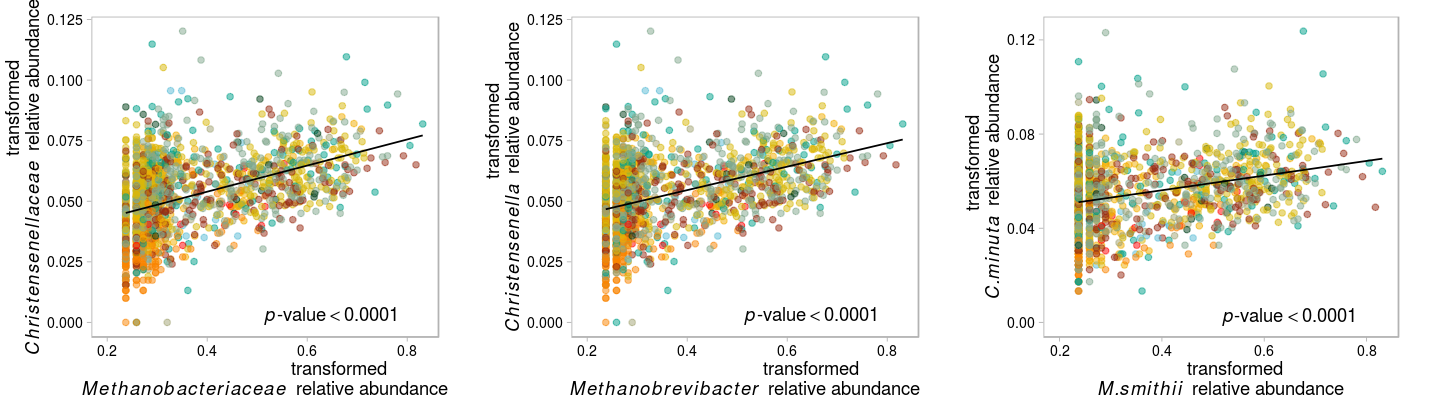

In [41]:
options(repr.plot.width=4*3, repr.plot.height=3.5)
multiplot(plotlist = list(mc_f, mc_g, mc_s), cols = 3)

## Bar plots

In [42]:
pp$Meth_f <- ifelse(pp$f_Methanobacteriaceae > 0, 'Yes', 'No') 
pp$Meth_g <- ifelse(pp$g_Methanobrevibacter > 0, 'Yes', 'No') 
pp$Meth_s <- ifelse(pp$s_Methanobrevibacter_smithii > 0, 'Yes', 'No') 

In [51]:
y_title <- 'Samples (n)'
x_f <- expression(italic(Methanobacteriaceae))
bp_f <- ggplot(pp , aes(x = Meth_s)) + 
            geom_bar(width = 0.4) + 
            theme_light() + ylim(c(NA, 1550))+
            ylab('') + xlab(x_f) +
            theme(legend.position = 'None'
                 , panel.grid = element_blank()
                 , plot.margin = margin(t = 10, b = 25, l = 15, r = 25) 
                 , legend.key.size = unit(0.9, "lines")
                 , axis.text = element_text(size = 8, colour = "black")
                 , axis.title.x = element_text(size = 7, margin = margin(t = 15, b = -10, l = 0, r = 0))
                 , axis.title.y = element_text(margin = margin(t = 30, b = 0, l = 0, r = 5))) 

x_g <- expression(italic(Methanobrevibacter))
bp_g <- ggplot(pp , aes(x = Meth_s)) + 
            geom_bar(width = 0.4) + 
            theme_light() + ylim(c(NA, 1550))+
            ylab('') + xlab(x_g) +
            theme(legend.position = 'None'
                 , panel.grid = element_blank()
                 , plot.margin = margin(t = 10, b = 25, l = 15, r = 25) 
                 , legend.key.size = unit(0.9, "lines")
                 , axis.text = element_text(size = 8.5, colour = "black")
                 , axis.title.x = element_text(size = 7, margin = margin(t = 15, b = -10, l = 0, r = 0))
                 , axis.title.y = element_text(margin = margin(t = 30, b = 0, l = 0, r = 5))) 

x_s <- expression(italic(M.smithii))
bp_s <- ggplot(pp , aes(x = Meth_s)) + 
            geom_bar(width = 0.4) + 
            theme_light() + ylim(c(NA, 1550))+
            ylab('') + xlab(x_s) +
            theme(legend.position = 'None'
                 , panel.grid = element_blank()
                 , plot.margin = margin(t = 10, b = 25, l = 15, r = 25) 
                 , legend.key.size = unit(0.9, "lines")
                 , axis.text = element_text(size = 8.5, colour = "black")
                 , axis.title.x = element_text(size = 7, margin = margin(t = 15, b = -10, l = 0, r = 0))
                 , axis.title.y = element_text(margin = margin(t = 30, b = 0, l = 0, r = 5))) 

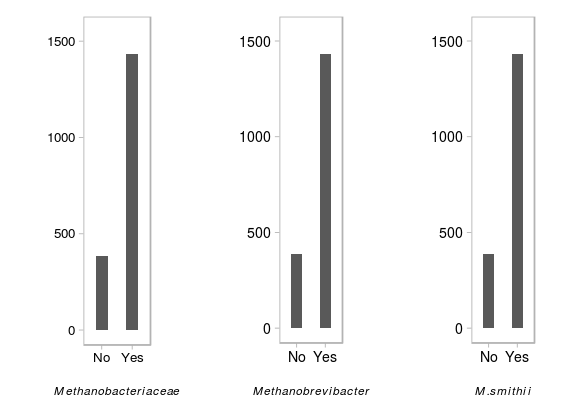

In [52]:
options(repr.plot.width=1.6*3, repr.plot.height=3.5)
multiplot(plotlist = list(bp_f, bp_g, bp_s), cols = 3)

## per dataset

In [53]:
(pp %>% colnames)[1:20]

[1] "ID"                     "Ind"                    "Batch"                 
 [4] "gender"                 "country"                "age"                   
 [7] "BMI"                    "BMIcat"                 "Msmi"                  
[10] "number_reads"           "countryCHN"             "countryDEU"            
[13] "countryFRA"             "countryUSA"             "BatchAMY"              
[16] "BatchBuschartA_2016"    "BatchFengQ_2015"        "BatchLeChatelierE_2013"
[19] "BatchQinN_2014"         "BatchRaymondF_2016"

In [87]:
names(col) <- pp.meta %>% arrange(Batch_rename) %>% select(Batch_rename) %>% unique %>% unlist

In [131]:
dataset.p <- list()
i <- 1

for (p in unique(pp.meta$Batch_rename)){
    pl <- ggplot(pp.meta %>% subset(Batch_rename == p)
                       , aes(y = Ch_tr, x = Meth_f_tr, fill = Batch_rename)) + 
            geom_point(alpha = 0.9, size = 1.5, shape = 21, color= 'black') + 
            
            xlim(c(0,0.9)) + ylim(c(0,0.125)) +
            theme_light() + 
            scale_fill_manual(values = col) +
            labs(x = 'Mf-tra', y = 'Cf-tra', title= p) + 
            theme(legend.position = 'none'
                 , axis.text = element_text(size = 9, colour = "black", margin = margin(t = 0, b = 0, l = 0, r = 0))
                 , axis.title.y = element_text(margin = margin(t = 0, b = 0, l = 0, r = 2))
                 , axis.title.x = element_text(margin = margin(t = 2, b = 3, l = 0, r = 0))
                 , plot.title = element_text(size = 10, colour = "black", face = 'bold', hjust = 0.5
                            , margin = margin(t = 0, b = 2) )
                 , plot.margin = margin(t = 2, b =5, r = 2, l = 5)
                 , panel.grid = element_blank()
                 ) +
            guides(color=guide_legend(nrow=1,byrow=TRUE))
    
    dataset.p[[i]] <- pl
    i <- i+1
}

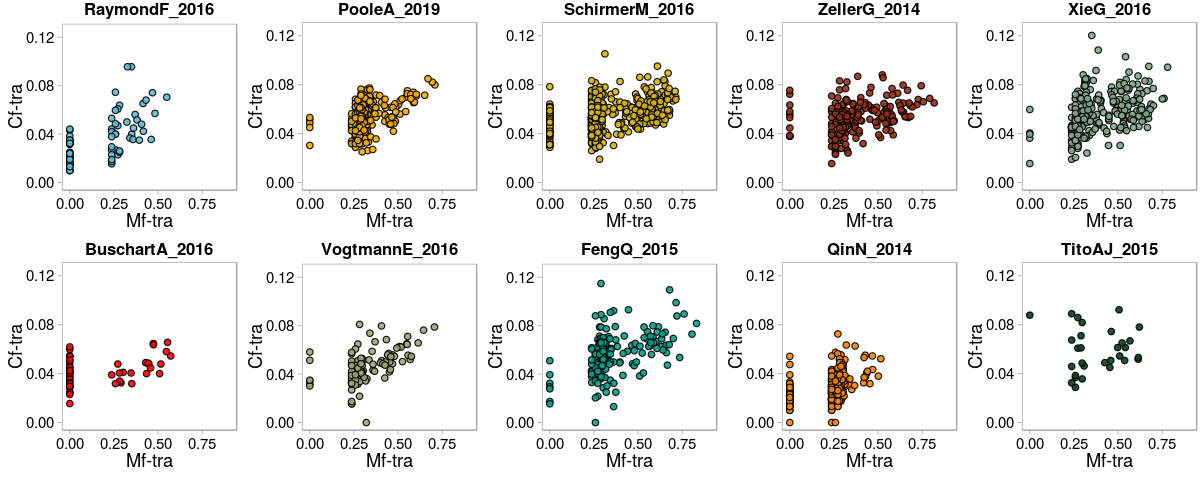

In [132]:
options(repr.plot.width=10, repr.plot.height=4)
multiplot(plotlist = dataset.p, cols = 5)